# ExcessMapEstimator vs. TSMapEstimator

This notebooks compares the results of the full likelihood fitting approach ("forward folding") against the Li&Ma solution of the same problem ("backwards folding"). The results are expected to be approximately equivalent in case of using a disk kernel for the `TSMapEstimator` and neclecting the effect of the PSF.

Results:
- The results are indeed equivalent except of the definition of the predicted counts in the null hypothesis case and the upper limits.

- The `ExcessMapEstimator` is faster by a factor of 50-100 for ordinary flux and error estimation. Once assymetric errors and ULs are computed the `TSMapEstimator` shows the better performance and is ~2-3 times faster.
- The `TSMapEstimator` still shows some boundary effect for the error like maps

In [1]:
from gammapy.estimators import ExcessMapEstimator, TSMapEstimator
from gammapy.datasets import MapDataset
from gammapy.modeling.models import (
    SkyModel,
    PowerLawNormSpectralModel,
    PowerLawSpectralModel,
    DiskSpatialModel
)
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt

In [2]:
dataset = MapDataset.read(
    "$GAMMAPY_DATA/cta-1dc-gc/cta-1dc-gc.fits.gz", name="cta_dataset"
)
dataset.psf = None

In [3]:
est = ExcessMapEstimator(
    correlation_radius="0.1 deg",
)

model = SkyModel(
    spectral_model=PowerLawSpectralModel(),
    spatial_model=DiskSpatialModel(r_0="0.1 deg")
)

ts_est = TSMapEstimator(
    model=model,
    sum_over_energy_groups=True,
)

In [4]:
est_all = ExcessMapEstimator(
    correlation_radius="0.1 deg",
    selection_optional="all"
)


ts_est_all = TSMapEstimator(
    model=model,
    sum_over_energy_groups=True,
    selection_optional="all",
    n_jobs=8
)

In [5]:
%%time
result = est.run(dataset=dataset)

CPU times: user 50.4 ms, sys: 14.8 ms, total: 65.2 ms
Wall time: 69.9 ms


In [6]:
%%time
result_ts = ts_est.run(dataset)

CPU times: user 4.05 s, sys: 83.9 ms, total: 4.14 s
Wall time: 4.19 s


In [7]:
%%time
result = est_all.run(dataset=dataset)

CPU times: user 1min 11s, sys: 299 ms, total: 1min 11s
Wall time: 1min 11s


In [8]:
%%time
result_ts = ts_est_all.run(dataset)

CPU times: user 780 ms, sys: 162 ms, total: 942 ms
Wall time: 7.81 s


In [9]:
def plot_side_by_side(m_1, m_2, **kwargs):
    fig = plt.figure(figsize=(14, 12))
    ax1 = plt.subplot(221, projection=m_1.geom.wcs)
    ax2 = plt.subplot(222, projection=m_1.geom.wcs)
    ax3 = plt.subplot(223, projection=m_1.geom.wcs)
    ax4 = plt.subplot(224)
    

    m_1.plot(ax1, **kwargs)
    ax1.set_title("ExcessMapEstimator")
    
    m_2.plot(ax2, **kwargs)
    ax2.set_title("TSMapEstimator")
    
    ax4.scatter(m_1.data.flat, m_2.data.flat, s=2, alpha=0.05)
    ax4.set_title("Correlation")
    ax4.set_xlabel("ExcessMapEstimator")
    ax4.set_ylabel("TSMapEstimator")
    ax4.set_xlim(kwargs["vmin"], kwargs["vmax"])
    ax4.set_ylim(kwargs["vmin"], kwargs["vmax"])
    x = np.linspace(kwargs["vmin"], kwargs["vmax"], 3)
    ax4.plot(x, x, color="k")
    ax4.set_aspect('equal')
    
    diff = (m_1 - m_2)
    vmax = -0.1 * kwargs["vmax"]
    diff.plot(ax=ax3, cmap="RdBu", stretch="linear", add_cbar=True, vmin=-vmax, vmax=vmax)
    ax3.set_title("Difference (ExcessMap - TSMap)")

## Flux

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


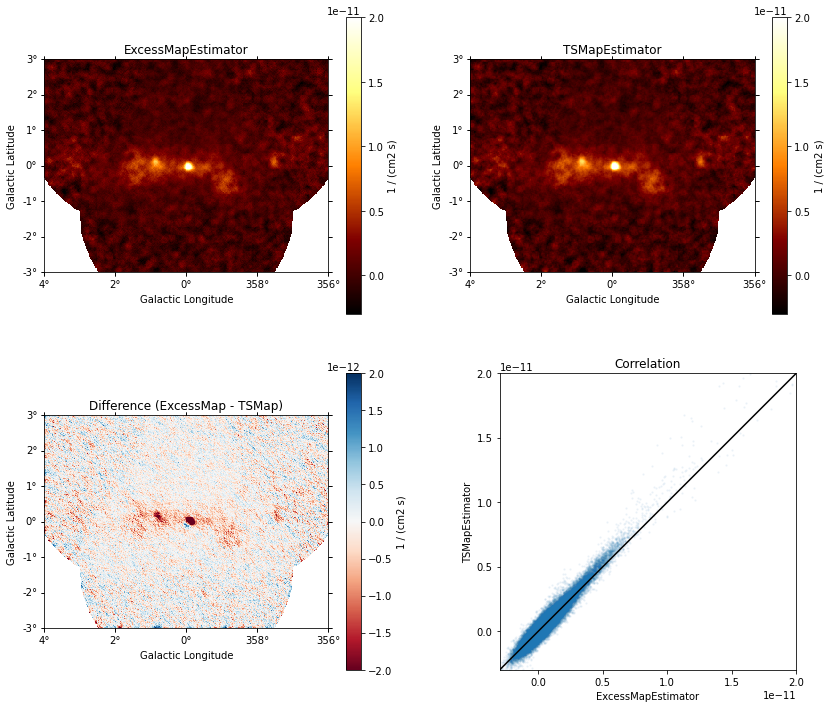

In [10]:
plot_side_by_side(
    result.flux,
    result_ts.flux,
    add_cbar=True,
    vmin=-0.3e-11,
    vmax=2e-11
);

## Flux Error

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


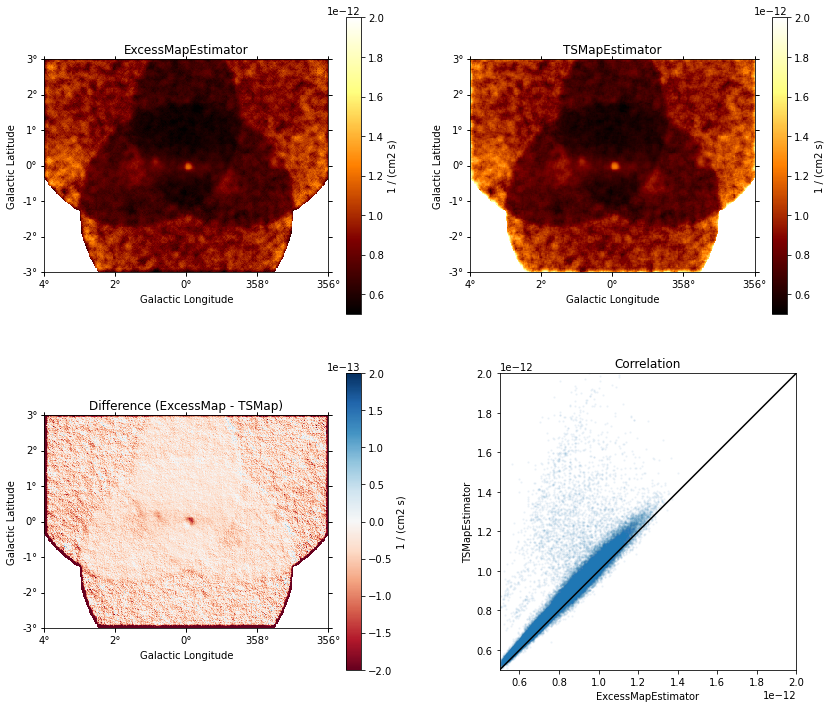

In [11]:
plot_side_by_side(
    result.flux_err,
    result_ts.flux_err,
    add_cbar=True,
    vmin=0.5e-12,
    vmax=2e-12
);

## Flux UL

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


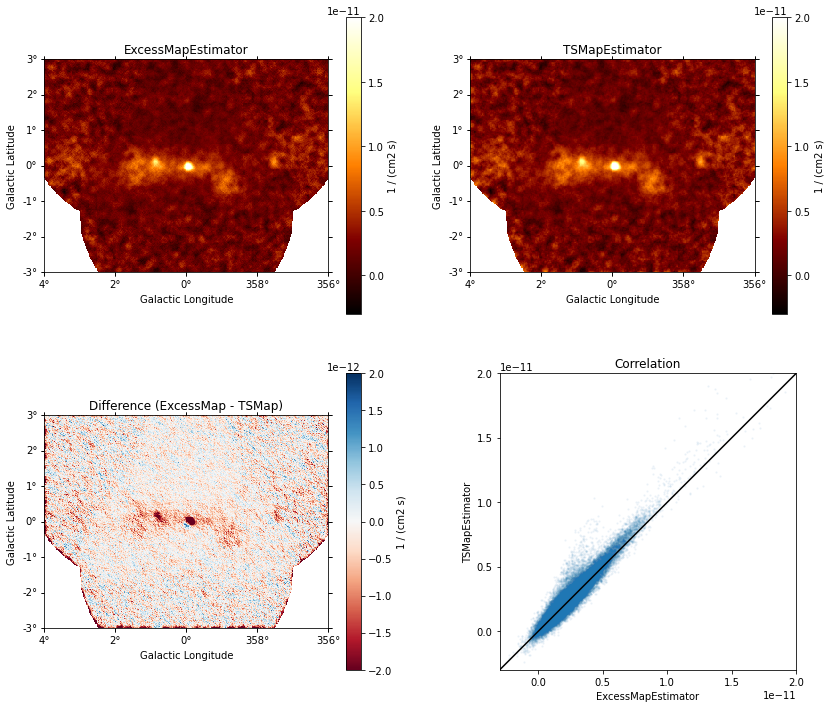

In [12]:
plot_side_by_side(
    result.flux_ul,
    result_ts.flux_ul,
    add_cbar=True,
    vmin=-0.3e-11,
    vmax=2e-11
);

## Flux Error Pos.

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


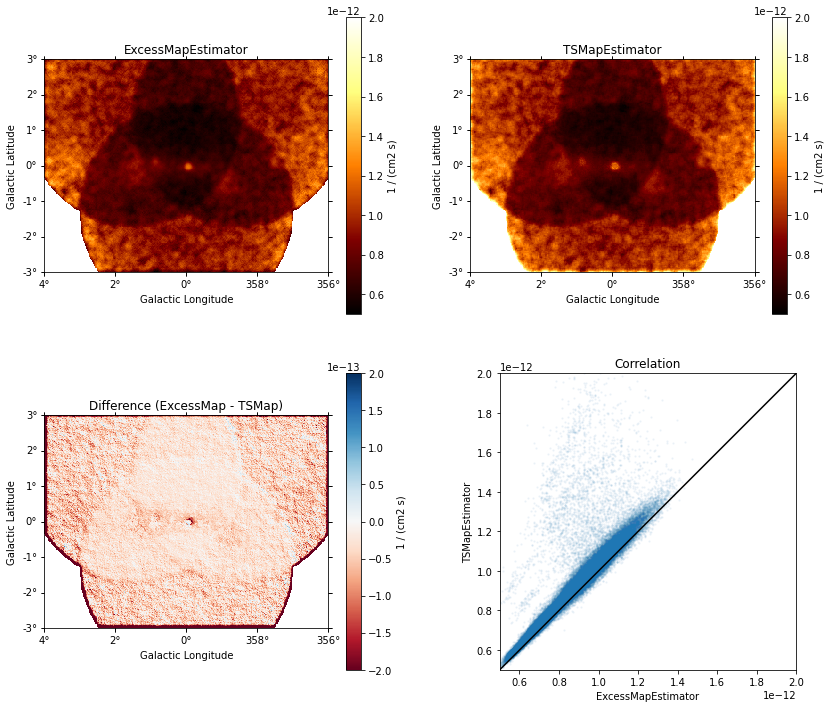

In [13]:
plot_side_by_side(
    result.flux_errp,
    result_ts.flux_errp,
    add_cbar=True,
    vmin=0.5e-12,
    vmax=2e-12
);

## Flux Error Neg.

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


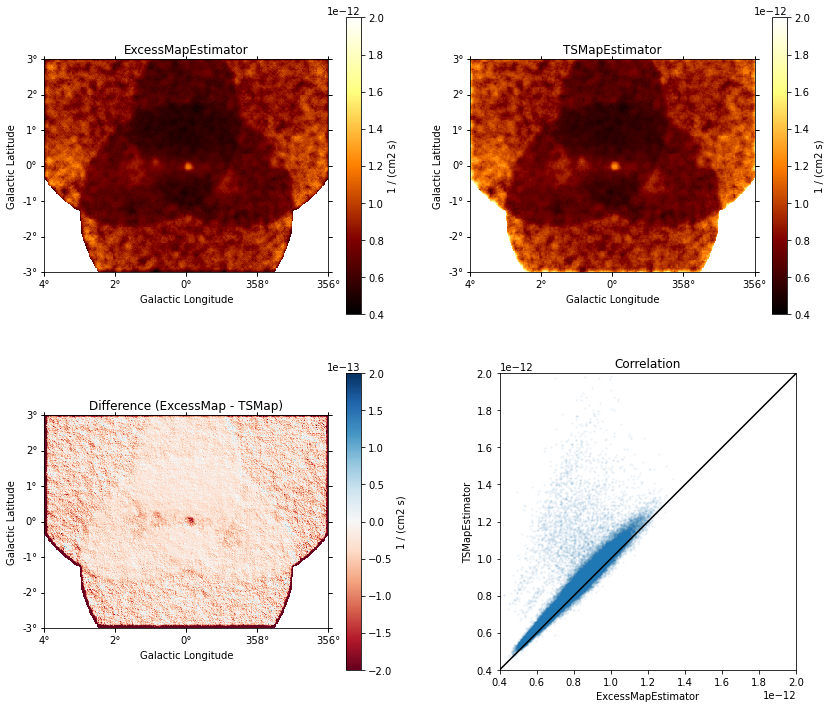

In [14]:
#result._data["norm_errn"].data *= -1

plot_side_by_side(
    result.flux_errn,
    result_ts.flux_errn,
    add_cbar=True,
    vmin=0.4e-12,
    vmax=2e-12
);

## Sqrt(TS)

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


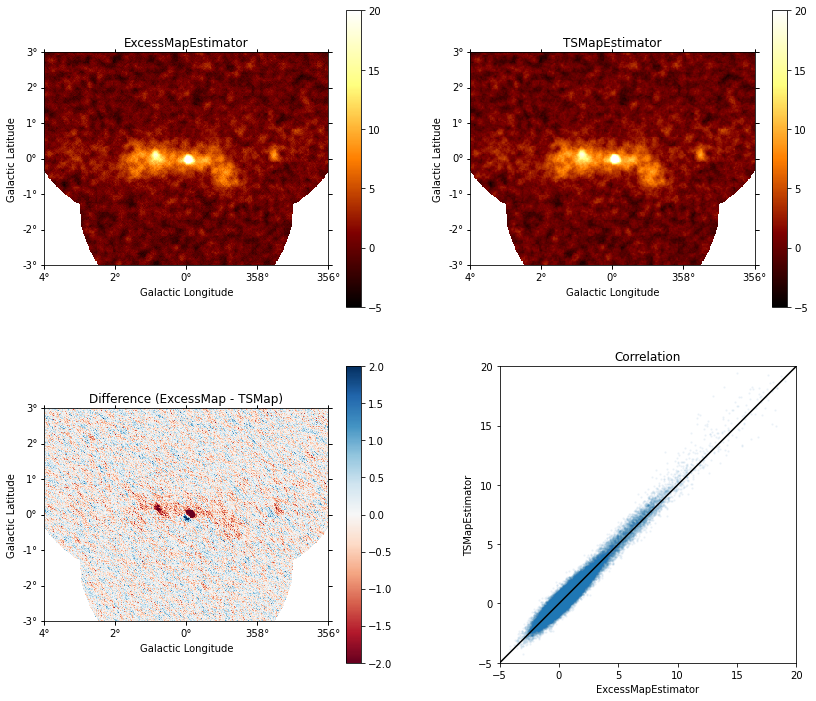

In [15]:
plot_side_by_side(
    result.sqrt_ts,
    result_ts.sqrt_ts,
    add_cbar=True,
    vmin=-5,
    vmax=20,
    stretch="linear"
);

## NPred Excess

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


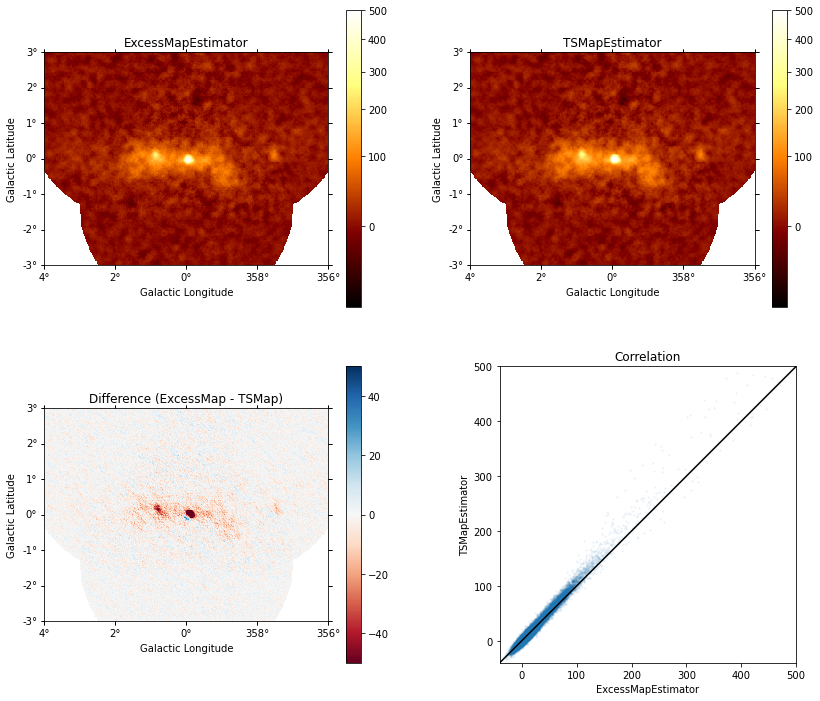

In [16]:
plot_side_by_side(
    result.npred_excess,
    result_ts.npred_excess,
    add_cbar=True,
    vmin=-40,
    vmax=500,
    stretch="sqrt"
);

# NPred Ref.

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


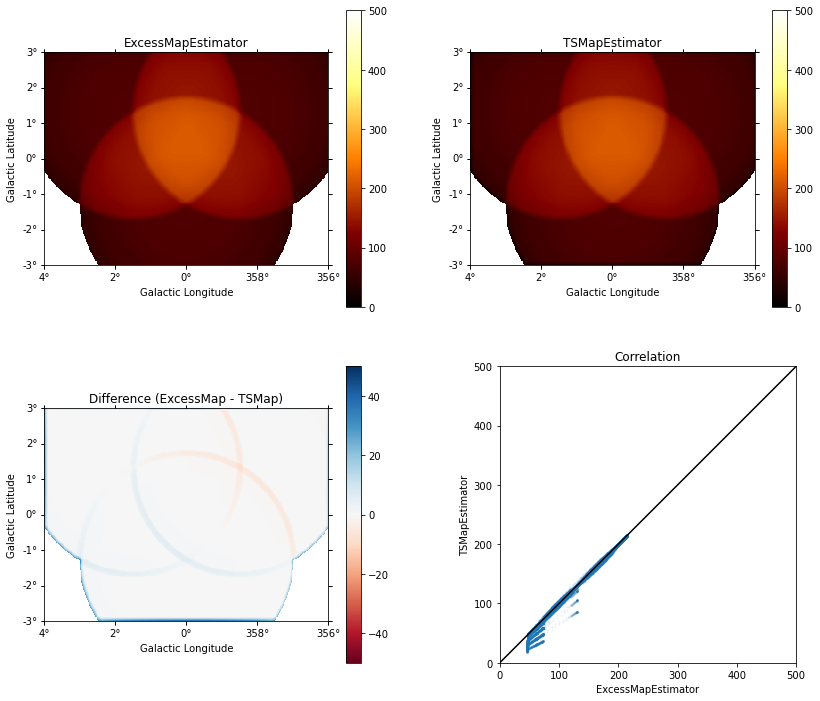

In [17]:
plot_side_by_side(
    result.npred_ref,
    result_ts.npred_ref,
    add_cbar=True,
    vmin=0,
    vmax=500,
);

# NPred Err

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


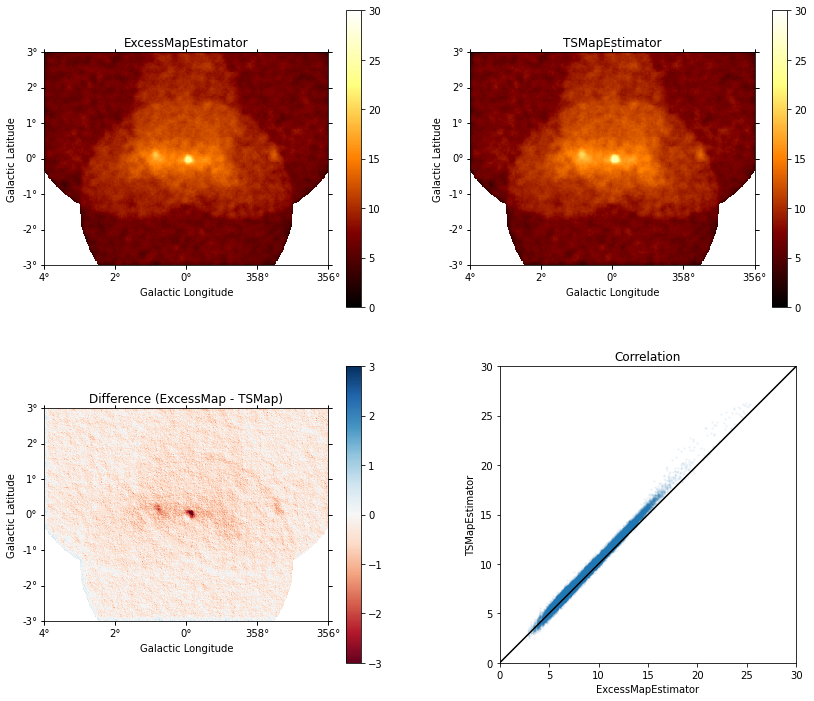

In [18]:
plot_side_by_side(
    result.npred_err,
    result_ts.npred_err,
    add_cbar=True,
    vmin=0,
    vmax=30,
);

# NPred Error Pos.

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


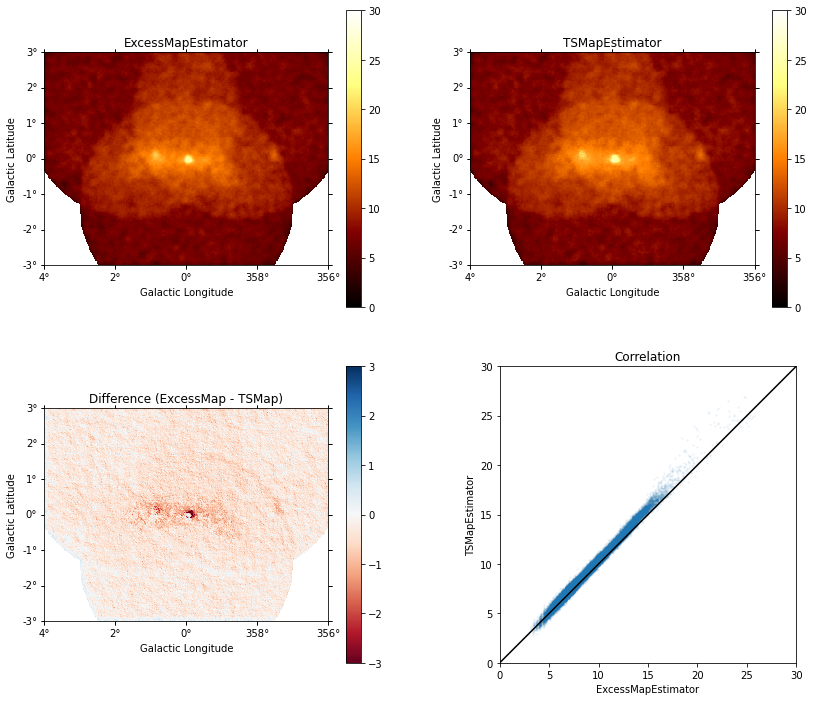

In [19]:
plot_side_by_side(
    result.npred_errp,
    result_ts.npred_errp,
    add_cbar=True,
    vmin=0,
    vmax=30,
);

# NPred Error Neg.

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


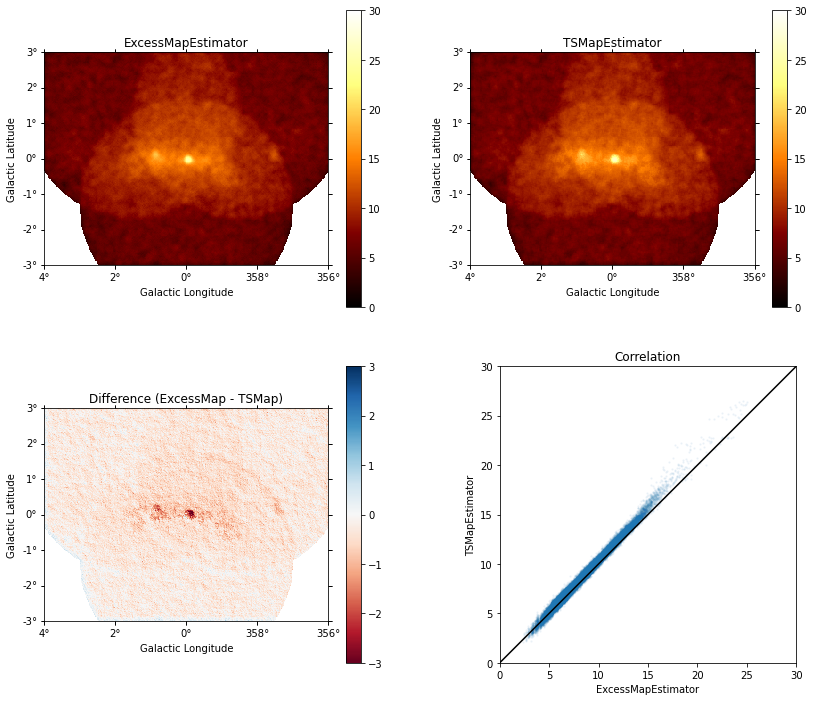

In [20]:
plot_side_by_side(
    result.npred_errn,
    result_ts.npred_errn,
    add_cbar=True,
    vmin=0,
    vmax=30,
);

# NPred UL

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


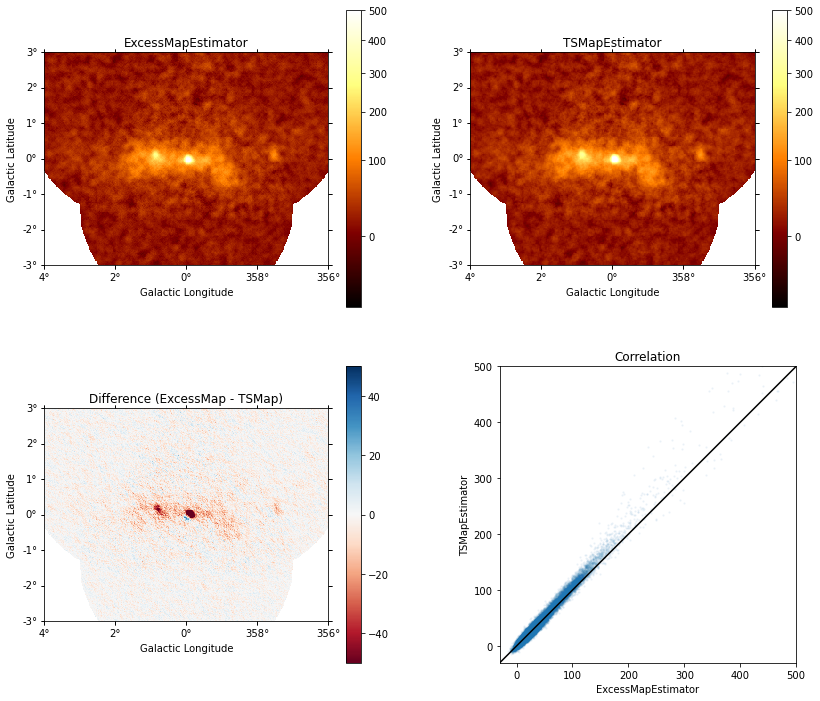

In [21]:
plot_side_by_side(
    result.npred_ul,
    result_ts.npred_ul,
    add_cbar=True,
    vmin=-30,
    vmax=500,
    stretch="sqrt"
);

# NPred

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


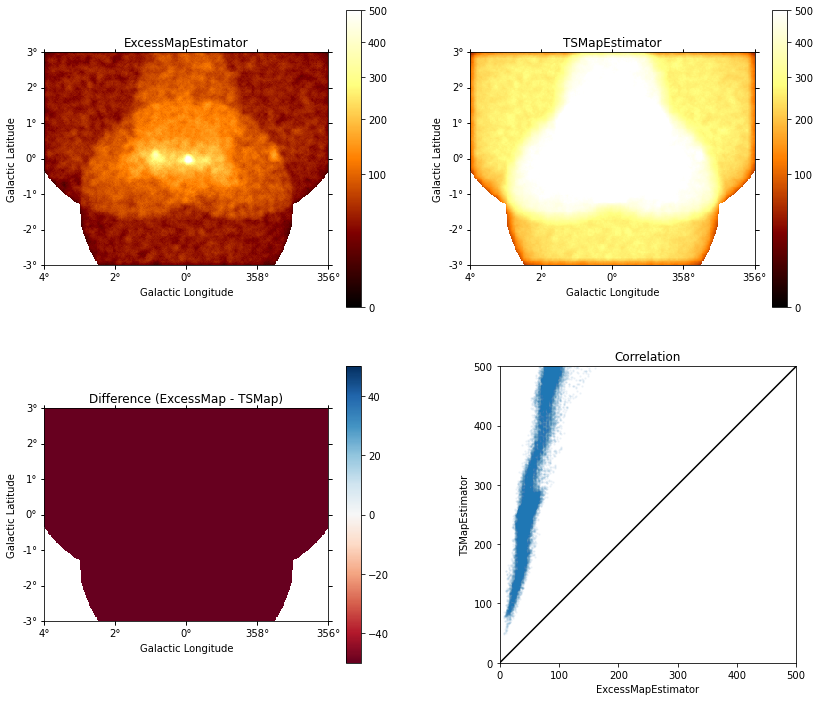

In [22]:
plot_side_by_side(
    result.npred,
    result_ts.npred,
    add_cbar=True,
    vmin=0,
    vmax=500,
    stretch="sqrt"
);

# NPred Null

/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)
/Users/axel/mambaforge/envs/gammapy-dev/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


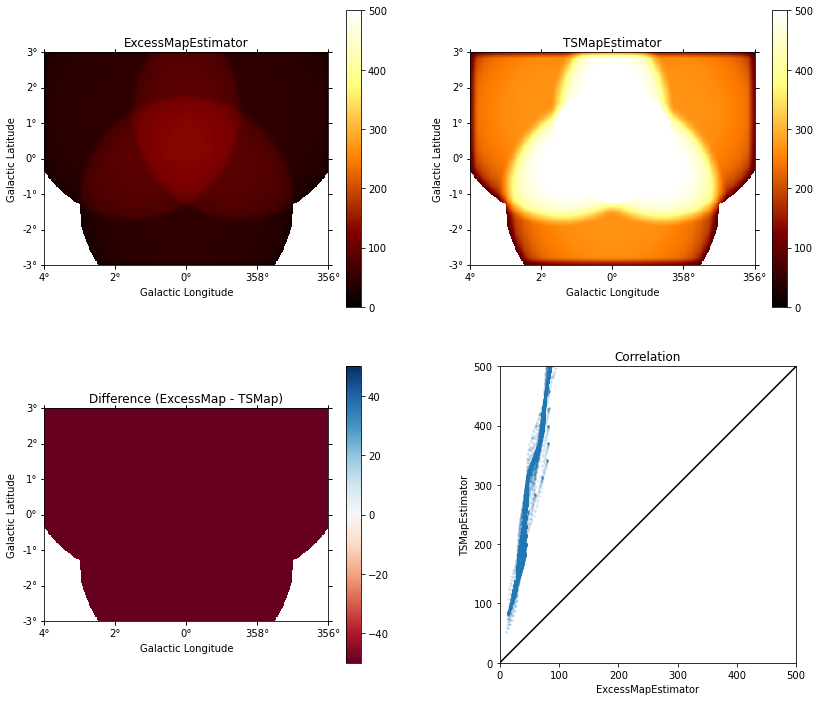

In [23]:
plot_side_by_side(
    result.npred_null,
    result_ts.npred_null,
    add_cbar=True,
    vmin=0,
    vmax=500,
);